# <center> Cluster Analysis


## K-means Clustering

The k-means clustering algorithm represents each cluster by its corresponding cluster centroid. The algorithm would partition the input data into *k* disjoint clusters by iteratively applying the following two steps:
1. Form *k* clusters by assigning each instance to its nearest centroid.
2. Recompute the centroid of each cluster.

In this section, we will perform k-means clustering on a toy example of movie ratings dataset. We first create the dataset as follows.

In [ ]:
import pandas as pd

ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]
titles = ['user','Jaws','Star Wars','Exorcist','Omen']
movies = pd.DataFrame(ratings,columns=titles)
movies

,user,Jaws,Star Wars,Exorcist,Omen
0,john,5,5,2,1
1,mary,4,5,3,2
2,bob,4,4,4,3
3,lisa,2,2,4,5
4,lee,1,2,3,4
5,harry,2,1,5,5


In this example dataset, the first 3 users liked action movies (Jaws and Star Wars) while the last 3 users enjoyed horror movies (Exorcist and Omen). Our goal is to apply k-means clustering on the users to identify groups of users with similar movie preferences.

The example below shows how to apply k-means clustering (with k=2) on the movie ratings data. We must remove the "user" column first before applying the clustering algorithm. The cluster assignment for each user is displayed as a dataframe object.

In [ ]:
from sklearn import cluster

data = movies.drop('user',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=100, random_state=1)
k_means.fit(data) 
labels = k_means.labels_
pd.DataFrame(labels, index=movies.user, columns=['Cluster ID'])

,Cluster ID
user,
john,1
mary,1
bob,1
lisa,0
lee,0
harry,0


The k-means clustering algorithm assigns the first three users to one cluster and the last three users to the second cluster. The results are consistent with our expectation. We can also display the centroid for each of the two clusters.

In [ ]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,Jaws,Star Wars,Exorcist,Omen
0,1.666667,1.666667,4.0,4.666667
1,4.333333,4.666667,3.0,2.000000


Observe that cluster 0 has higher ratings for the horror movies whereas cluster 1 has higher ratings for action movies. The cluster centroids can be applied to other users to determine their cluster assignments. 

In [ ]:
import numpy as np

testData = np.array([[4,5,1,2],[3,2,4,4],[2,3,4,1],[3,2,3,3],[5,4,1,4]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
usernames = np.array(['paul','kim','liz','tom','bill']).reshape(-1,1)
cols = movies.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


,user,Jaws,Star Wars,Exorcist,Omen,Cluster ID
0,paul,4,5,1,2,1
1,kim,3,2,4,4,0
2,liz,2,3,4,1,1
3,tom,3,2,3,3,0
4,bill,5,4,1,4,1


In [ ]:
import numpy as np

testData = np.array([[4,2,4,5],[4,3,1,2],[5,5,2,3],[2,3,1,1]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
usernames = np.array(['Paul','Adel','Kevin','Jessi']).reshape(-1,1)
cols = movies.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


,user,Jaws,Star Wars,Exorcist,Omen,Cluster ID
0,Paul,4,2,4,5,0
1,Adel,4,3,1,2,1
2,Kevin,5,5,2,3,1
3,Jessi,2,3,1,1,1


To determine the number of clusters in a dataset, we can apply k-means with varying number of clusters from 1 to 6 and compute their corresponding sum-of-squared errors (SSE) as shown in the example below. The "elbow" in the plot of SSE versus number of clusters can be used to estimate the number of clusters.

Text(0, 0.5, 'SSE')

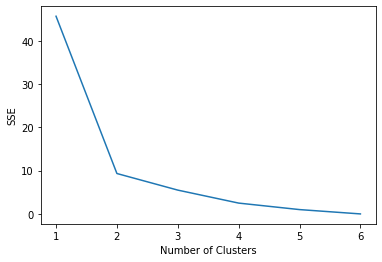

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

## Hierarchical Clustering [Vertebrate dataset]

This section demonstrates how to apply hierarchical clustering on the vertebrate dataset. Specifically, we illustrate the results of using 3 hierarchical clustering algorithms provided by the Python scipy library: (1) single link (MIN), (2) complete link (MAX), and (3) group average. Other hierarchical clustering algorithms provided by the library include centroid-based and Ward's method.

In [ ]:
# Mounting google drive to read data
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:
filepath = "/content/gdrive/My Drive/CS_5525_DA/Project 2/Project2/Experiment1/Dataset/vertebrate.csv"

In [ ]:
import pandas as pd

data = pd.read_csv(filepath,header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


### Single Link (MIN)

Cophenetic correlation coefficient of Single Link (MIN) is 0.35580411323343614


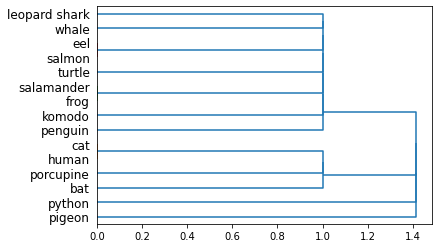

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = data['Name']
Y = data['Class']
Yarr = pd.factorize(Y)[0].reshape(-1,1) # converting Y to a numeric ndarray
Ydist = pdist(Yarr,metric='hamming'); # computing pair-wise distances among animals using hamming distance over their class labels
X = data.drop(['Name','Class'],axis=1)
Z = hierarchy.linkage(X.to_numpy(), 'single')
c, Zdist = hierarchy.cophenet(Z,Ydist); # Computing cophenetic correlation coefficient
print (f"Cophenetic correlation coefficient of Single Link (MIN) is {c}")
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

### Complete Link (MAX)

Cophenetic correlation coefficient of Complete Link (MAX) is 0.6063706366458652


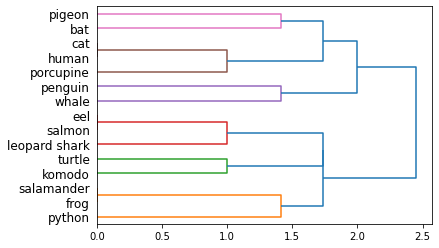

In [ ]:
Z = hierarchy.linkage(X.to_numpy(), 'complete')
c, Zdist = hierarchy.cophenet(Z,Ydist); # Computing cophenetic correlation coefficient
print (f"Cophenetic correlation coefficient of Complete Link (MAX) is {c}")
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

### Group Average

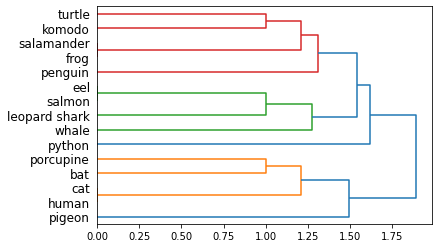

In [ ]:
Z = hierarchy.linkage(X.to_numpy(), 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

To evaluate the above clustering algorithms, we can look at the known grouping of animals based on the 'Class' column.

In [ ]:
data[['Name','Class']].sort_values(by='Class')

,Name,Class
4,frog,amphibians
14,salamander,amphibians
7,pigeon,birds
11,penguin,birds
2,salmon,fishes
9,leopard shark,fishes
13,eel,fishes
0,human,mammals
3,whale,mammals
6,bat,mammals


If animals from the same class are merged earlier in the denrodgram than animals from different classes, then we would say that the clustering expressed by the dendrogram conforms with the class labels. This can be quantitatively measured using the **cophenetic correlation coefficient**, which computes the correlation between the pair-wise distance matrix of points obtained from the dendrogram (the dendrogram distance at which a pair of points are merged into a common cluster), and a pre-specified pair-wise distance matrix (e.g., computed from class labels). A high cophenetic correlation indicates better match between the hierarchical clustering and the class labels. Below, we compute the cophenetic correlation coefficient for the Group average algorithm, and plot the pair-wise distance matrices obtained from the dendrogram and the class labels.

Cophenetic correlation coefficient is 0.4886522572675798


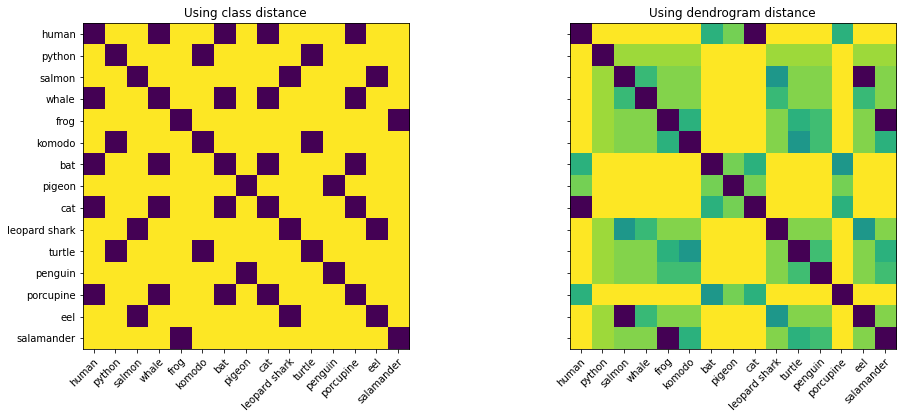

In [ ]:
from scipy.spatial.distance import pdist, squareform

Yarr = pd.factorize(Y)[0].reshape(-1,1) # converting Y to a numeric ndarray
Ydist = pdist(Yarr,metric='hamming'); # computing pair-wise distances among animals using hamming distance over their class labels

fig, ax = plt.subplots(1,2, sharey=True, sharex=True, figsize=(16,6));
ax[0].imshow(squareform(Ydist));
ax[0].title.set_text('Using class distance');

Z = hierarchy.linkage(X.to_numpy(), 'average')
c, Zdist = hierarchy.cophenet(Z,Ydist); # Computing cophenetic correlation coefficient

ax[1].imshow(squareform(Zdist)); # plotting the distance among points based on the dendrogram
ax[1].title.set_text('Using dendrogram distance');
ax[0].set_yticks(np.arange(len(names)));
ax[0].set_yticklabels(names);
ax[0].set_xticks(np.arange(len(names)));
ax[0].set_xticklabels(names);
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor");
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor");
print (f"Cophenetic correlation coefficient is {c}")

## Density-Based Clustering

Density-based clustering identifies the individual clusters as high-density regions that are separated by regions of low density. DBScan is one of the most popular density based clustering algorithms. In DBScan, data points are classified into 3 types---core points, border points, and noise points---based on the density of their local neighborhood. The local neighborhood density is defined according to 2 parameters:  radius of neighborhood size (eps) and minimum number of points in the neighborhood (min_samples). 

For this approach, we will use a noisy, 2-dimensional dataset originally created by Karypis et al. [1] for evaluating their proposed CHAMELEON algorithm. The example code shown below will load and plot the distribution of the data.

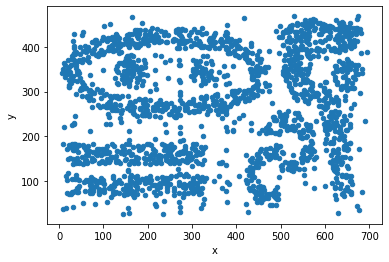

In [ ]:
import pandas as pd
filepath2 = "/content/gdrive/My Drive/CS_5525_DA/Project 2/Project2/Experiment1/Dataset/chameleon.data"
data = pd.read_csv(filepath2, delimiter=' ', names=['x','y'])
data.plot.scatter(x='x',y='y')

We apply the DBScan clustering algorithm on the data by setting the neighborhood radius (eps) to 15.5 and minimum number of points (min_samples) to be 5. The clusters are assigned to IDs between 0 to 8 while the noise points are assigned to a cluster ID equals to -1.

Number of clusters produced: 80


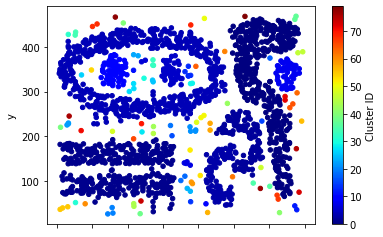

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15.5, min_samples=1).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print (f"Number of clusters produced: {labels.max()[0]+1}")

Number of clusters produced: 34


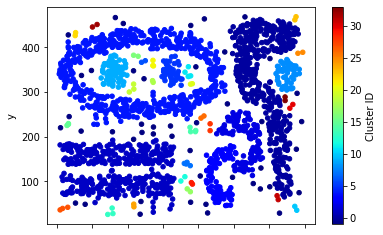

In [ ]:
db = DBSCAN(eps=15.5, min_samples=2).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print (f"Number of clusters produced: {labels.max()[0]+1}")

Number of clusters produced: 16


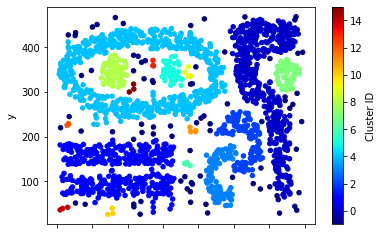

In [ ]:
db = DBSCAN(eps=15.5, min_samples=3).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print (f"Number of clusters produced: {labels.max()[0]+1}")

Number of clusters produced: 11


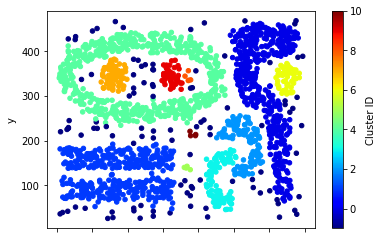

In [ ]:
db = DBSCAN(eps=15.5, min_samples=4).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print (f"Number of clusters produced: {labels.max()[0]+1}")

Number of clusters produced: 9


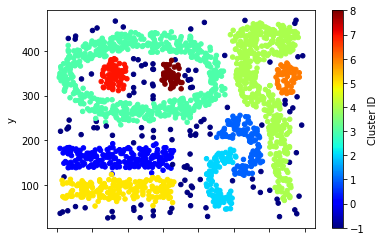

In [ ]:
db = DBSCAN(eps=15.5, min_samples=5).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print (f"Number of clusters produced: {labels.max()[0]+1}")

## Challenges of K-means with non-globular clusters

One of the main limitations of the k-means clustering algorithm is its tendency to seek for globular-shaped clusters. Thus, it does not work when applied to datasets with arbitrary-shaped clusters or when the cluster centroids overlapped with one another. To illustrate this, consider the following two-dimensional datasets.

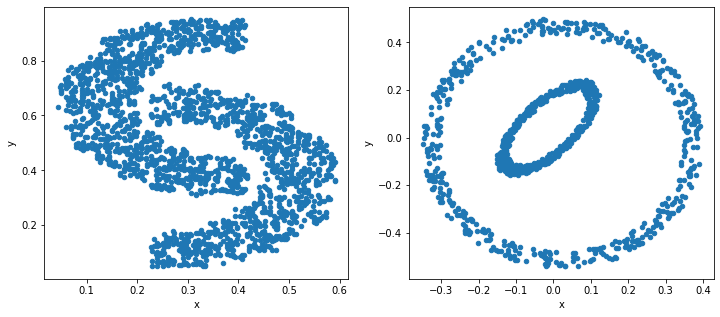

In [ ]:
import pandas as pd
filepath3 = "/content/gdrive/My Drive/CS_5525_DA/Project 2/Project2/Experiment1/Dataset/2d_data.txt"
filepath4 = "/content/gdrive/My Drive/CS_5525_DA/Project 2/Project2/Experiment1/Dataset/elliptical.txt"
data1 = pd.read_csv(filepath3, delimiter=' ', names=['x','y'])
data2 = pd.read_csv(filepath4, delimiter=' ', names=['x','y'])

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
data1.plot.scatter(x='x',y='y',ax=ax1)
data2.plot.scatter(x='x',y='y',ax=ax2)

Below, we demonstrate the results of applying k-means to the datasets (with k=2).

Text(0.5, 1.0, 'K-means Clustering')

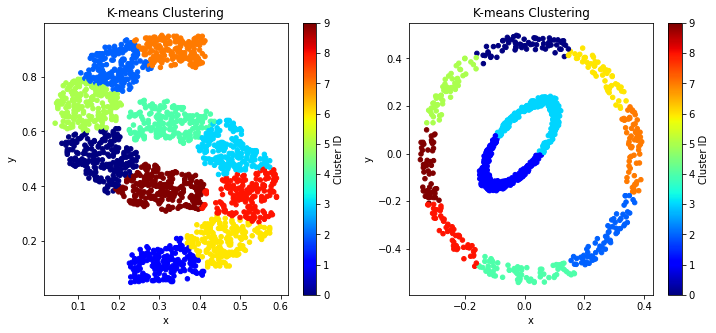

In [ ]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=10, max_iter=50, random_state=1)
k_means.fit(data1)
labels1 = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
result1 = pd.concat((data1,labels1), axis=1)

k_means2 = cluster.KMeans(n_clusters=10, max_iter=50, random_state=1)
k_means2.fit(data2)
labels2 = pd.DataFrame(k_means2.labels_,columns=['Cluster ID'])
result2 = pd.concat((data2,labels2), axis=1)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
result1.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('K-means Clustering')
result2.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('K-means Clustering')

The plots above show the poor performance of k-means clustering.


References:
[1] George Karypis, Eui-Hong Han, and Vipin Kumar. CHAMELEON: A Hierarchical Clustering Algorithm Using Dynamic Modeling. IEEE Computer 32(8): 68-75, 1999.